In [2]:
import sys
sys.path.append('..')
sys.path.append('../../stlcg/src')

import numpy as np
import data_generator as dg
import dataset as dl
import matplotlib.pyplot as plt
import os 
import stlcg
import torch


## Loading data

In [17]:
H = 20
data = dl.Dataset(path=os.path.join('../data', 'fan_clean.npy'), history_size=H)

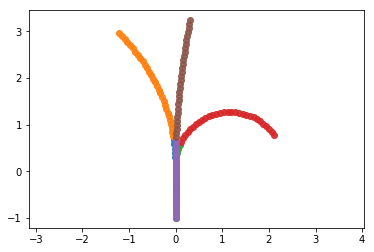

In [18]:
plt.figure()

for i in [0, 300, 500]:
    track = data[i]
    h = track[0]
    p = track[1]

    plt.plot(h[:, 0], h[:, 1], 'o', alpha=0.9)
    plt.plot(p[:, 0], p[:, 1], 'o', alpha=0.9)
    plt.axis('equal')

In [26]:
data = np.load(os.path.join('../data', 'fan_clean.npy'))
y = data
print(data.shape)

(600, 50, 2)


torch.Size([600, 48, 2])
torch.Size([600, 48, 2])
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0630,  0.0630,  0.0630],
        [-0.0000,  0.0000,  0.0000,  ...,  0.3797,  0.3797,  0.3797],
        [ 0.0000, -0.0000,  0.0000,  ...,  0.1684,  0.1684,  0.1684],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ..., -0.3220, -0.3220, -0.3220],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.4113, -0.4113, -0.4113],
        [ 0.0000, -0.0000,  0.0000,  ..., -0.1626, -0.1626, -0.1626]])


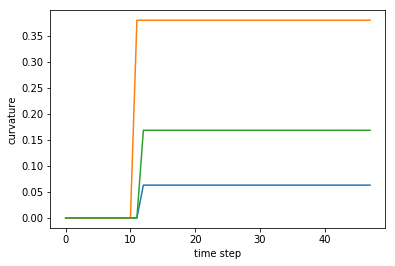

(-2.481060791015625, 0.118145751953125, -1.1979113221168518, 3.156137764453888)

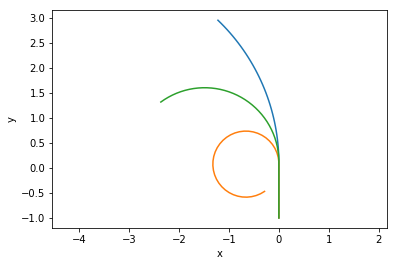

In [39]:
# estimate curvature
y = torch.as_tensor(y).float()
y_next = y[:, 1:, :]
y_prev = y[:, :-1, :]

v = y_next - y_prev
v_next = v[:, 1:, :]
v_prev = v[:, :-1, :]
a = v_next - v_prev

v_centered = y[:, 2:, :] - y[:, :-2, :]

dx = v_centered[:, :, 0]
ddx = a[:, :, 0]
dy = v_centered[:, :, 1]
ddy = a[:, :, 1]

k = (dx * ddy - dy * ddx) / ((dx **2 + dy ** 2) ** (3/2))

k_ = k[:, -1:]
print(v_centered.shape)
print(a.shape)
# k = torch.norm(a, dim=-1)

#print(torch.norm(v_prev, dim=-1))
print(k)

plt.figure()
plt.plot(k[0])
plt.plot(k[1])
plt.plot(k[2])
plt.ylabel('curvature')
plt.xlabel('time step')
plt.show()

plt.figure()
plt.plot(y[0, :, 0], y[0, :, 1])
plt.plot(y[1, :, 0], y[1, :, 1])
plt.plot(y[2, :, 0], y[2, :, 1])
plt.ylabel('y')
plt.xlabel('x')
plt.axis('equal')

# print(k)
# N, _, _ = a.shape

# s = stlcg.Expression('s', torch.abs(a=k))
# ϵ = torch.as_tensor(np.zeros([N, 1, 1])).float().requires_grad_(True)
# ϕ = stlcg.Always(subformula=(s > ϵ), interval=[30, 50])

# #training
# max_epoch = 1000
# lr = 0.005

# for epoch in range(max_epoch):

#     loss = torch.relu(-ϕ.robustness(s).squeeze()).sum()
#     loss.backward()

#     with torch.no_grad():
#         ϵ -= lr* ϵ.grad
        
#     if epoch % 100 == 0:
#         print("%i  loss: %.3f"%(epoch,loss.cpu().detach().numpy()))

#     ϵ.grad.zero_()
#     if loss == 0:
#         print("%i  loss: %.3f"%(epoch, loss.cpu().detach().numpy()))
#         break

# print(ϵ.shape)

In [50]:
np.save(os.path.join('../data', 'fan_clean_k'), k_.squeeze())